In [ ]:
library(tidyverse)
install.packages('Lahman')
library(Lahman)
options(repr.plot.width=8, repr.plot.height=8)

In [ ]:
install.packages("ggplot2")
library(ggplot2)

In [ ]:
install.packages('scales')
library(scales)

In [76]:
options(repr.plot.width=8, repr.plot.height=8)

In [115]:
salary <- Lahman::Salaries
batting <- Lahman::Batting
teams <- Lahman::Teams

In [124]:
teams <- teams %>% filter(yearID >= 1985)
teams %>% head %>% print

  yearID lgID teamID franchID divID Rank   G Ghome  W  L DivWin WCWin LgWin
1   1985   NL    ATL      ATL     W    5 162    81 66 96      N  <NA>     N
2   1985   AL    BAL      BAL     E    4 161    81 83 78      N  <NA>     N
3   1985   AL    BOS      BOS     E    5 163    81 81 81      N  <NA>     N
4   1985   AL    CAL      ANA     W    2 162    79 90 72      N  <NA>     N
5   1985   AL    CHA      CHW     W    3 163    81 85 77      N  <NA>     N
6   1985   NL    CHN      CHC     E    4 162    81 77 84      N  <NA>     N
  WSWin   R   AB    H X2B X3B  HR  BB  SO  SB CS HBP SF  RA  ER  ERA CG SHO SV
1     N 632 5526 1359 213  28 126 553 849  72 52  22 41 781 679 4.19  9   9 29
2     N 818 5517 1451 234  22 214 604 908  69 43  19 40 764 694 4.38 32   6 33
3     N 800 5720 1615 292  31 162 562 816  66 27  30 57 720 659 4.06 35   8 29
4     N 732 5442 1364 215  31 153 648 902 106 51  39 35 703 633 3.91 22   8 41
5     N 736 5470 1386 247  37 146 471 843 108 56  43 45 720 656 4.07 20  

In [121]:
data <- batting %>% inner_join(salary, by=c('yearID','teamID','lgID','playerID'))
data <- data %>% select(yearID, teamID, lgID, salary) %>%
  group_by(yearID, teamID, lgID) %>%
    summarize(team_salary = sum(salary)) %>%
    arrange(yearID, teamID)
team_salary <- data %>% group_by(teamID, lgID) %>%
  summarize(avg_salary = mean(team_salary))
team_salary %>% arrange(avg_salary) %>% print

`summarise()` has grouped output by 'yearID', 'teamID'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'teamID'. You can override using the
`.groups` argument.


# A tibble: 36 × 3
# Groups:   teamID [35]
   teamID lgID  avg_salary
   <fct>  <fct>      <dbl>
 1 ML4    AL     17515664.
 2 MON    NL     19553588.
 3 CAL    AL     21730397.
 4 FLO    NL     34467263.
 5 PIT    NL     36232778.
 6 OAK    AL     41286483.
 7 SDN    NL     43003854.
 8 KCA    AL     43313347.
 9 MIN    AL     44921244.
10 TBA    AL     45194527.
# ℹ 26 more rows


In [ ]:
avg_wins <- teams %>% select(yearID, lgID, teamID, franchID, W, name) %>%
  group_by(franchID) %>% summarize(lgID, teamID, name, avg_wins = mean(W)) %>%
  unique

In [119]:
team_data <- avg_wins %>% left_join(team_salary, by=('teamID')) %>% group_by(franchID) %>%
  summarize(lgID = lgID.x, avg_wins, avg_salary = mean(avg_salary)/26) %>% unique %>% print

Warning message in left_join(., team_salary, by = ("teamID")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 17 of `x` matches multiple rows in `y`.
ℹ Row 10 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'franchID'. You can override using the
`.groups` argument.


# A tibble: 32 × 4
# Groups:   franchID [30]
   franchID lgID  avg_wins avg_salary
   <fct>    <fct>    <dbl>      <dbl>
 1 ANA      AL        80.5   2490182.
 2 ARI      NL        76.6   2718207.
 3 ATL      NL        84.4   2333825.
 4 BAL      AL        72.9   2195905.
 5 BOS      AL        84.9   3294955.
 6 CHC      NL        77.2   2534717.
 7 CHW      AL        78.9   2292858.
 8 CIN      NL        77.2   1914012.
 9 CLE      AL        80.4   1828774.
10 COL      NL        73.4   2318746.
# ℹ 22 more rows


`geom_smooth()` using formula = 'y ~ x'


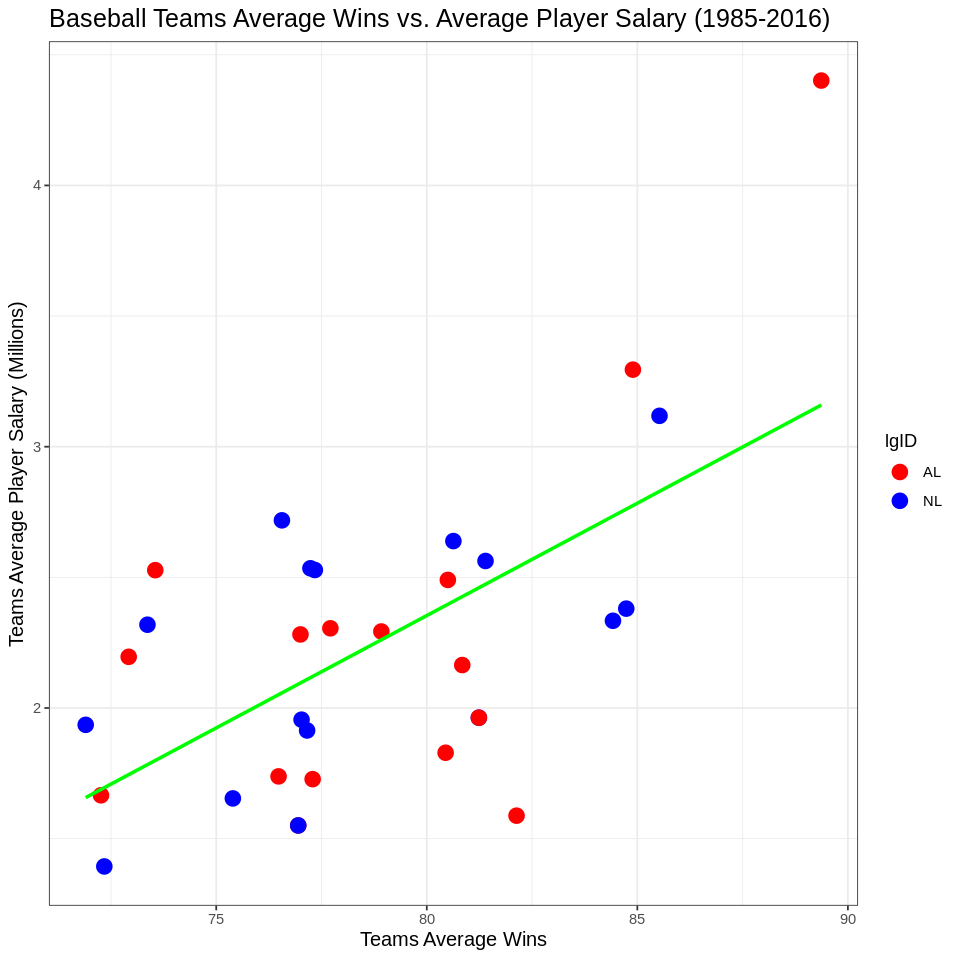

In [120]:
team_data %>% ggplot(aes(x=avg_wins, y=avg_salary)) +
  geom_point(size = 4, aes(color=lgID)) +
  geom_smooth(method=lm, se=FALSE, color="green") +
  labs(title = "Baseball Teams Average Wins vs. Average Player Salary (1985-2016)", x = "Teams Average Wins", y = "Teams Average Player Salary (Millions)") +
  scale_color_manual(values = c("red", "blue")) +
  theme_bw() +
  theme(plot.title = element_text(size = 15),
        axis.title.x = element_text(size = 12),
        axis.title.y = element_text(size = 12)) +
  scale_y_continuous(labels = label_number(scale = 1e-6))